# 1. Introduction


* The Python language is extremely popular in part because it makes writing programs easy. 
* Python is a high-level language, which means we don’t need to worry about allocating memory or choosing how certain operations are done by our computers' processors like we do when we use a low-level language, such as C. 
* `This means that coding in a low-level language takes longer; however, we have more ability to optimize our code to run faster`.

<block><pre>
Language Type	Example	      Time taken to write program	Control over program performance
High-Level	    Python	              Low	                             Low
Low-Level	      C	                  High	                              High

<block></pre>

# 2. Introduction to Ndarrays

* The core data structure in NumPy is the ndarray or n-dimensional array. 
*  The word n-dimensional refers to the fact that ndarrays can have one or more dimensions.


* To use the NumPy library, we first need to import it into our Python environment. NumPy is commonly imported using the alias np 

In [1]:
# import numpy as alias np
import numpy as np 

* we can directly convert a list to an ndarray using the numpy.array() constructor.

In [2]:
listt=[2,3,4,5]
nd_array=np.array(listt)
print(nd_array)
print(type(nd_array))

[2 3 4 5]
<class 'numpy.ndarray'>


# 3. Understanding Vectorization

* Lists of lists are sufficient for working with small data sets, they aren't very good for working with larger data sets.
* To sum single column using list of list ,have to loop over length of list times which is not feasible.

####  The NumPy library takes advantage of a processor feature called Single Instruction Multiple Data (SIMD) to process data faster. SIMD allows a processor to perform the same operation, on multiple data points, in a single processor cycle:

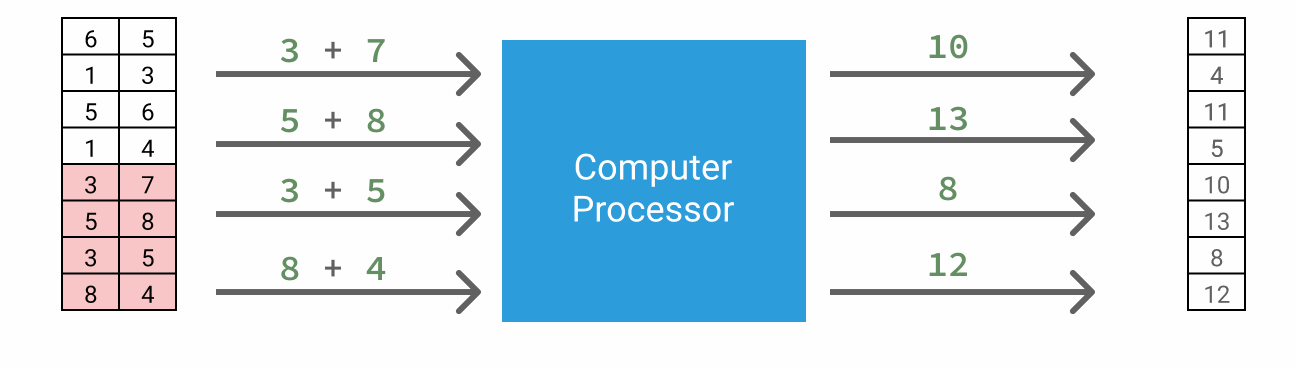

* As a result, the NumPy version of our code would only take two processor cycles — a four times speed-up! 


#### This concept of replacing for loops with operations applied to multiple data points at once is called vectorization and` ndarrays make vectorization possible.`

# 4. NYC Taxi-Airport Data

In [3]:
# import csv and numpy modules
# Store file as list of list then convert to numpy array 

from csv import reader
import numpy as np 

nyc=list(reader(open('nyc_taxis.csv')))
print(nyc[:3])

[['pickup_year', 'pickup_month', 'pickup_day', 'pickup_dayofweek', 'pickup_time', 'pickup_location_code', 'dropoff_location_code', 'trip_distance', 'trip_length', 'fare_amount', 'fees_amount', 'tolls_amount', 'tip_amount', 'total_amount', 'payment_type'], ['2016', '1', '1', '5', '0', '2', '4', '21.00', '2037', '52.00', '0.80', '5.54', '11.65', '69.99', '1'], ['2016', '1', '1', '5', '0', '2', '1', '16.29', '1520', '45.00', '1.30', '0.00', '8.00', '54.30', '1']]


In [4]:
nyc_header=nyc[:1]
nyc_header

[['pickup_year',
  'pickup_month',
  'pickup_day',
  'pickup_dayofweek',
  'pickup_time',
  'pickup_location_code',
  'dropoff_location_code',
  'trip_distance',
  'trip_length',
  'fare_amount',
  'fees_amount',
  'tolls_amount',
  'tip_amount',
  'total_amount',
  'payment_type']]

In [5]:
taxi_list=nyc[1:]

In [6]:
# convert all values of taxi_list to floats because numpy supports only one data type in any particular dataset
converted_taxi_list = []

for row in taxi_list:
    converted_row = []
    for item in row:
        converted_row.append(float(item))
    converted_taxi_list.append(converted_row)

In [7]:
print(converted_taxi_list[:3])

[[2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 4.0, 21.0, 2037.0, 52.0, 0.8, 5.54, 11.65, 69.99, 1.0], [2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 1.0, 16.29, 1520.0, 45.0, 1.3, 0.0, 8.0, 54.3, 1.0], [2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 6.0, 12.7, 1462.0, 36.5, 1.3, 0.0, 0.0, 37.8, 2.0]]


In [8]:
#Convert converted taxi list to numpy array

taxi=np.array(converted_taxi_list)

In [9]:
print(taxi[:3])

[[2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 4.000e+00
  2.100e+01 2.037e+03 5.200e+01 8.000e-01 5.540e+00 1.165e+01 6.999e+01
  1.000e+00]
 [2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 1.000e+00
  1.629e+01 1.520e+03 4.500e+01 1.300e+00 0.000e+00 8.000e+00 5.430e+01
  1.000e+00]
 [2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 6.000e+00
  1.270e+01 1.462e+03 3.650e+01 1.300e+00 0.000e+00 0.000e+00 3.780e+01
  2.000e+00]]



# 5. Array Shapes

* `ndarray.shape` attribute is used to find shape of array

In [10]:
taxi_shape=taxi.shape
taxi_shape

(89560, 15)

* The data type returned is called a tuple. Tuples are very similar to Python lists, but can't be modified.

In [11]:
print('no of rows: %s'%taxi_shape[0])
print('no of columns %s'%taxi_shape[1])

no of rows: 89560
no of columns 15


# 6. Selecting and Slicing Rows and Items from ndarrays

### comparison between working with ndarrays and list of lists to select one or more rows of data:

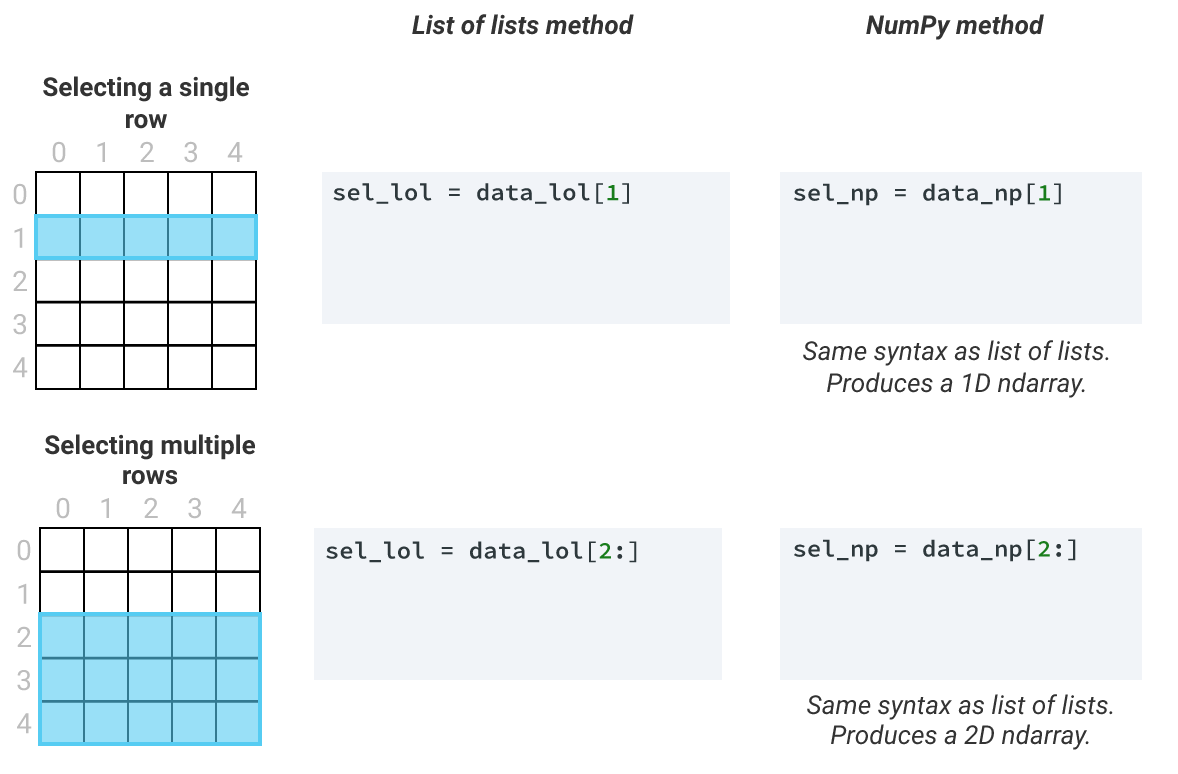 

### (1)Selecting single row

In [12]:
# using list of list
row_l=converted_taxi_list[1]

# using numpy
row_n=taxi[1]

print(row_l)
print(row_n)
# same output

[2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 1.0, 16.29, 1520.0, 45.0, 1.3, 0.0, 8.0, 54.3, 1.0]
[2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 1.000e+00
 1.629e+01 1.520e+03 4.500e+01 1.300e+00 0.000e+00 8.000e+00 5.430e+01
 1.000e+00]


### (2) Selecting multiple rows

In [13]:
# using list of list
row_mul_list=converted_taxi_list[1:4]

# using numpy array
row_mul_numpy=taxi[1:4]

print(row_mul_list)
print(row_mul_numpy)

[[2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 1.0, 16.29, 1520.0, 45.0, 1.3, 0.0, 8.0, 54.3, 1.0], [2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 6.0, 12.7, 1462.0, 36.5, 1.3, 0.0, 0.0, 37.8, 2.0], [2016.0, 1.0, 1.0, 5.0, 0.0, 2.0, 6.0, 8.7, 1210.0, 26.0, 1.3, 0.0, 5.46, 32.76, 1.0]]
[[2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 1.000e+00
  1.629e+01 1.520e+03 4.500e+01 1.300e+00 0.000e+00 8.000e+00 5.430e+01
  1.000e+00]
 [2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 6.000e+00
  1.270e+01 1.462e+03 3.650e+01 1.300e+00 0.000e+00 0.000e+00 3.780e+01
  2.000e+00]
 [2.016e+03 1.000e+00 1.000e+00 5.000e+00 0.000e+00 2.000e+00 6.000e+00
  8.700e+00 1.210e+03 2.600e+01 1.300e+00 0.000e+00 5.460e+00 3.276e+01
  1.000e+00]]


* As shown above, we can select rows in ndarrays very similarly to lists of lists. In reality, what we're seeing is a kind of shortcut.

## For any 2D array, the full syntax for selecting data is:

`ndarray[row_index,column_index]`
​
#or if you want to select all
#columns for a given set of rows
ndarray[row_index]

* Where row_index defines the location along the row axis and column_index defines the location along the column axis.
* Like lists, array slicing is from the first specified index up to — but not including — the second specified index. 

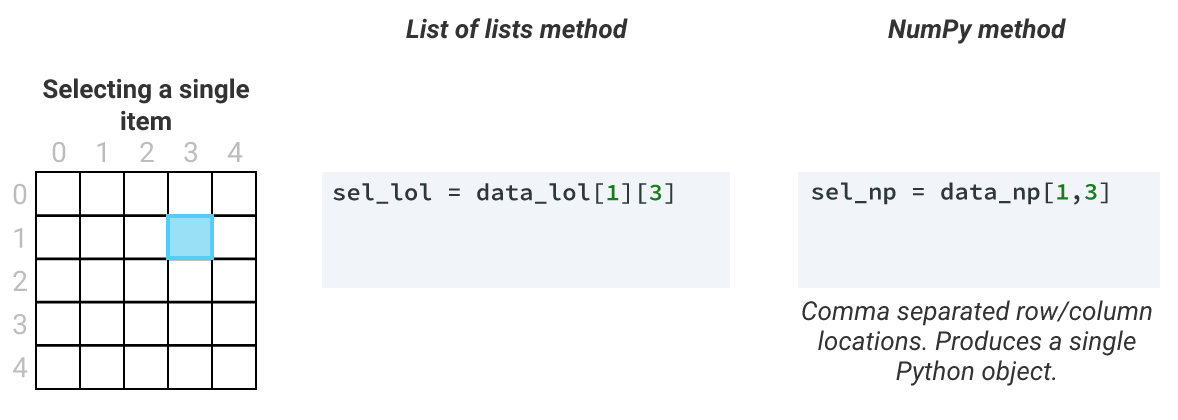

In [14]:
# Selecting single item from dataset

# using list of list method
item_l=converted_taxi_list[1][2]

# using numpy method
item_n=taxi[1,2]

print(item_l)
print(item_n)

1.0
1.0


In [15]:
# select single row
row_0=taxi[0]

# select slice of rows
rows_391_to_500=taxi[391:501]

# select single item
row_21_column_5=taxi[21,5]

# 7. Selecting Columns and Custom Slicing ndarrays

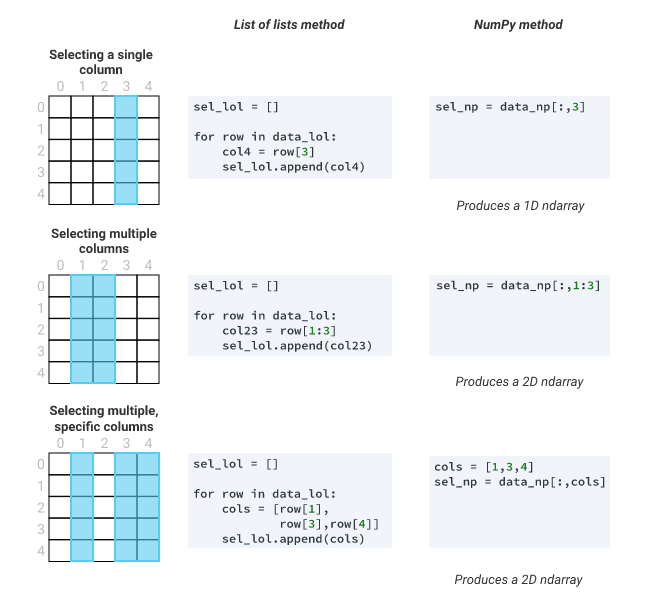

###  Selecting columns using list of list and numpy comparison


<block><pre>
                                                         List of list method                       Numpy method

1. Selecting Single column                               sel_col=[]                                     data_np[:,3]   

                                                         for row in data_col:
                                                            col3=row[3]
                                                            sel_col.append(col3)
                                                        
2. Selecting multiple columns                            sel_col=[]                                   data_np[:,2:5]
                                                         for row in data_col:
                                                             col25=row[2:5]
                                                             sel_col.append(col25)

3. Selecting multiple specefic columns                   sel_col=[]                                    cols=[3,6,8]
                                                         for row in data_col:                        data_np[:,cols]
                                                             sel_col.append([row[3],row[6],row[8]])
<block></pre>

* With a list of lists, we need to use a for loop to extract specific column(s) and append them back to a new list. With ndarrays, the process is much simpler

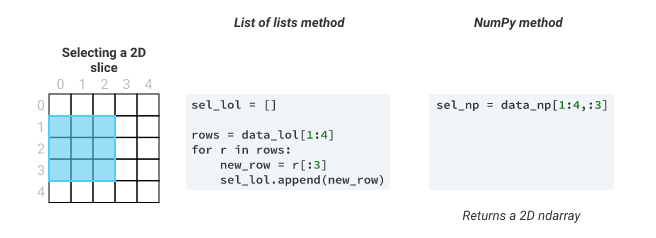

# 8. Vector Math

* NumPy ndarrays allow us to select data much more easily. Beyond this, the selection we make is a lot faster when working with vectorized operations because the operations are applied to multiple data points at once.

In [16]:
# to add two columns we have to loop over entire data set in list of list
 
# adding two columns in numpy

fare_amount = taxi[:,9]
fees_amount = taxi[:,10]
fare_and_fees=fare_amount + fees_amount

In [17]:
fare_and_fees

array([52.8, 46.3, 37.8, ..., 52.8, 35.8, 49.3])

# 9. Vector Math Continued

We can actually use any of the standard Python numeric operators with vectors, including:

* vector_a + vector_b - Addition
* vector_a - vector_b - Subtraction
* vector_a * vector_b - Multiplication (this is unrelated to the vector multiplication used in linear algebra).
* vector_a / vector_b - Division

### miles per hour anaylysis of trip length

In [18]:
trip_distance_miles = taxi[:,7]
trip_length_seconds = taxi[:,8]

trip_length_hours = trip_length_seconds / 3600 # 3600 seconds is one hour
trip_mph=trip_distance_miles/trip_length_hours

In [19]:
print(trip_mph[:5])

[37.11340206 38.58157895 31.27222982 25.88429752 26.3715415 ]


# 10. Calculating Statistics For 1D ndarrays

we created trip_mph, a 1D ndarray of the average mile-per-hour speed of each trip in our dataset. Next, we'll explore this data further and calculate the minimum, maximum, and mean values for trip_mph

In [20]:
# ndarray.min()
trip_mph_min=trip_mph.min()
print('minimum of trip miles per hour is %s'%trip_mph_min)

# ndarray.max()
trip_mph_max=trip_mph.max()
print('max of trip miles per hour is %s'%trip_mph_max)

# ndarray.mean()
trip_mph_mean=trip_mph.mean()
print('Average of trip miles per hour is %s'%trip_mph_mean)

minimum of trip miles per hour is 0.0
max of trip miles per hour is 82800.0
Average of trip miles per hour is 32.24258580925573


* A trip speed of 82,000 mph is definitely not possible in New York traffic - that's almost 20x faster than the fastest plane in the world! This could be due to an error in the devices that records the data, or perhaps errors made somewhere in the data pipeline.

Numpy ndarrays have methods for many different calculations. A few key methods are:

* ndarray.min() to calculate the minimum value
* ndarray.max() to calculate the maximum value
* ndarray.mean() to calculate the mean or average value
* ndarray.sum() to calculate the sum of the values

Whenever you see the syntax `ndarray.method_name()`, substitute ndarray with the name of your ndarray (in this case, trip_mph) like this:
`trip_mph.min()`

# 11. Calculating Statistics For 1D ndarrays Continued

### difference in functions and methods
* Functions act as `stand alone segments of code` that usually take an input, perform some processing, and return some output. For example, we can use the len() function to calculate the length of a list or the number of characters in a string.
* In contrast, methods are special functions that belong to a specific type of object. For eg - append() is method specefic to list

<block><pre>
In NumPy, sometimes there are operations that are implemented as both methods and functions, which can be confusing. Let's look at some examples:

Calculation	                                Function Representation	       Method Representation
Calculate the minimum value of trip_mph	        np.min(trip_mph)	           trip_mph.min()
Calculate the maximum value of trip_mph	        np.max(trip_mph)	           trip_mph.max()
Calculate the mean average value of trip_mph	np.mean(trip_mph)	           trip_mph.mean()
Calculate the median average value of trip_mph	np.median(trip_mph)	        There is no ndarray median method


<block></pre>

### To remember the right terminology, anything that starts with np (e.g. np.mean()) is a function and anything expressed with an object (or variable) name first (e.g. trip_mph.mean()) is a method. 

# 12. Calculating Statistics For 2D ndarrays

* If we use the ndarray.max() method on a 2D ndarray without any additional parameters, it will return a single value, just like with a 1D array:

* We'd need to use the axis parameter and specify a value of 1 to indicate we want to calculate the maximum value for each row.
`ndarray.max(axis=1)`

In [21]:
# we'll compare against the first 5 rows only
taxi_first_five = taxi[:5]

# select these columns: fare_amount, fees_amount, tolls_amount, tip_amount
fare_components = taxi_first_five[:,9:13]
fare_sums=fare_components.sum(axis=1)
fare_totals=taxi_first_five[:,13]

print(fare_totals)
print(fare_sums)

[69.99 54.3  37.8  32.76 18.8 ]
[69.99 54.3  37.8  32.76 18.8 ]


In this mission we learned:

* How vectorization makes our code faster.
* About n-dimensional arrays, and NumPy's ndarrays.
* How to select specific items, rows, columns, 1D slices, and 2D slices from ndarrays.
* How to apply simple calculations to entire ndarrays.
* How to use vectorized methods to perform calculations across either axis of ndarrays.